## House Price Prediction 

In [1]:
import pandas as pd 
import numpy as npm 

In [2]:
file_path = "housing_data.csv"
housing_df = pd.read_csv(file_path)
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


housing_df.info()

In [3]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
%matplotlib inline 

In [5]:
import matplotlib.pyplot as plt 

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

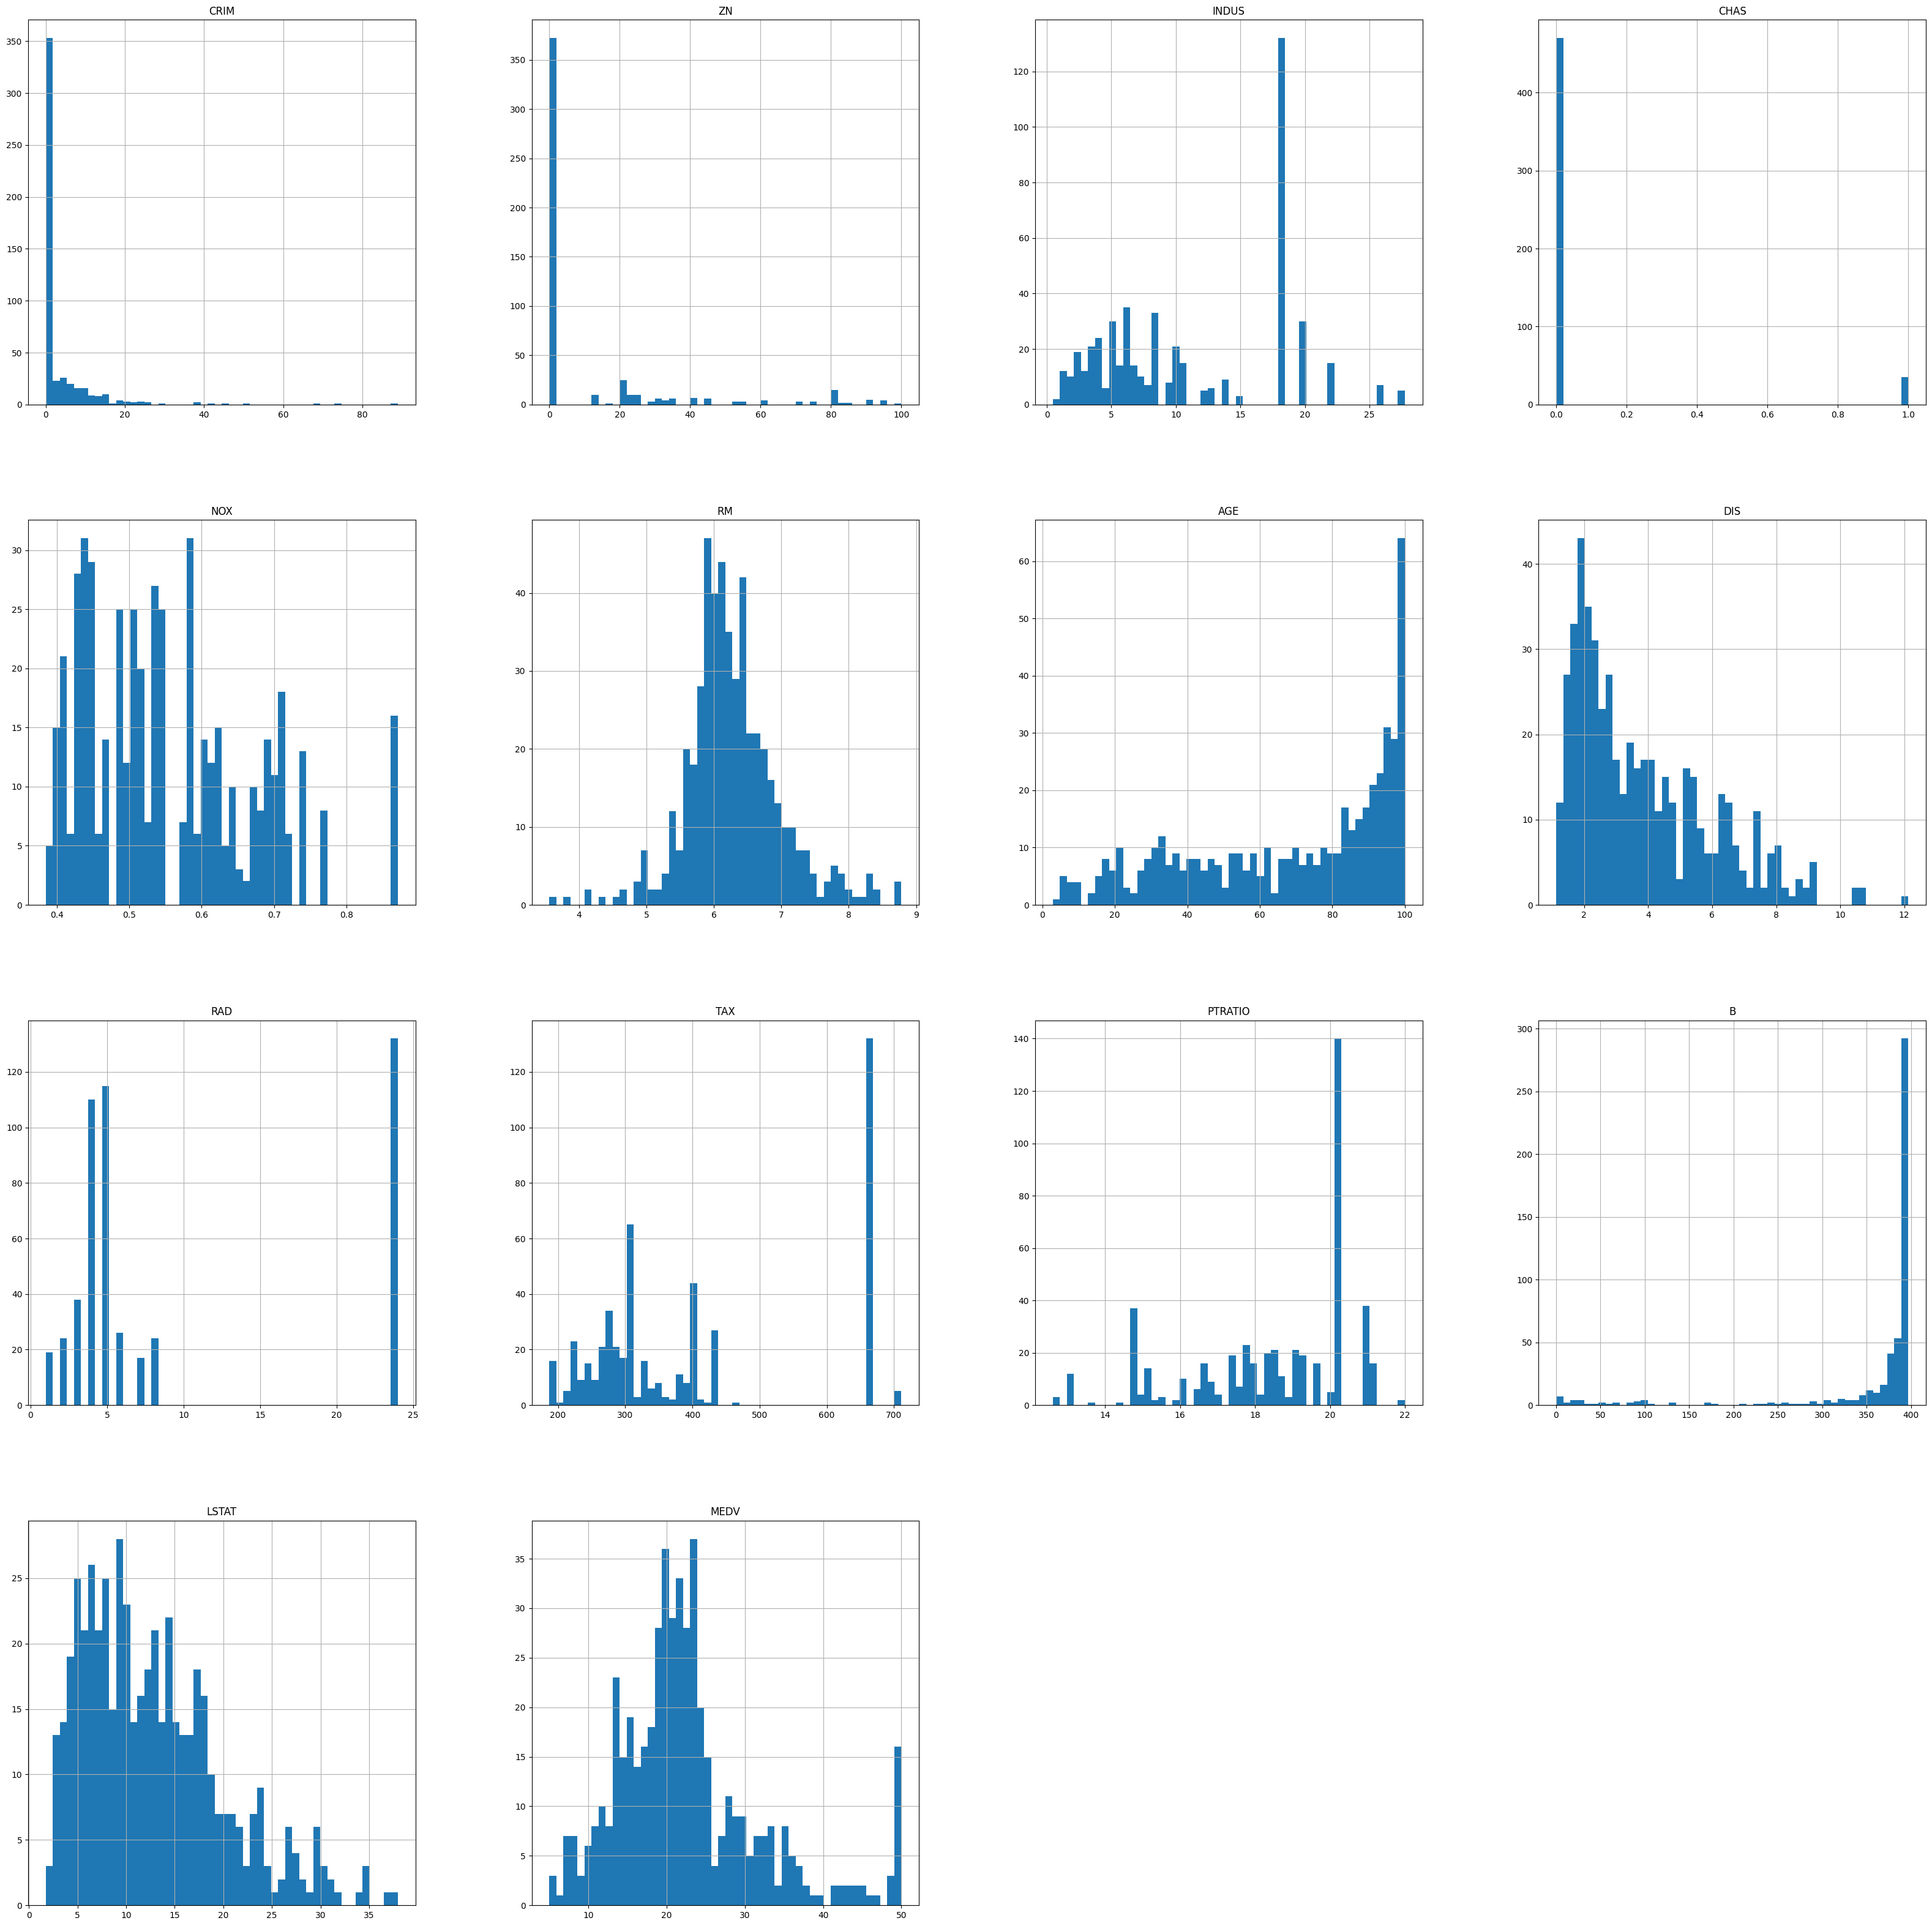

In [6]:
housing_df.hist(bins=50, figsize=(40,40))

## Train Test splitting 
algorithm for train and test splitting 
1.function teakes 2 parameters - data and test_data percentage (20% = 0.2)
2. shuffle the data
3. splitting 20% data for testing using index, 0 to 0.2*len(data) [20% of len of data]
4. splitting rest 80% for traingin [testing_Data : ]

In [7]:
import numpy as np
import pandas as pd

def custom_train_test_split_df(data, test_size=0.2):
    np.random.seed(42)

    # Shuffle the indices of the data
    indices = np.arange(len(data))
    np.random.shuffle(indices)

    # Calculate the index to split the data
    split_index = int(len(data) * test_size)

    # Split the indices into training and testing sets
    test_indices = indices[:split_index]
    train_indices = indices[split_index:]

    # Split the data into training and testing sets
    train_data = data.iloc[train_indices]
    test_data = data.iloc[test_indices]

    return train_data, test_data


In [8]:
# Assuming your DataFrame is stored in a variable named 'housing_df'
train_data_df, test_data_df = custom_train_test_split_df(housing_df, test_size=0.2)


In [9]:
test_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,22.6
274,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98,32.0
490,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54,23.4
305,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222,18.4,396.90,6.47,33.4


### Performing the same task using sklearn library (easy to use)

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42, shuffle=True)

In [11]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
75,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398,18.7,373.66,11.97,20.0
442,9.96654,0.0,18.10,0,0.740,6.485,100.0,1.9784,24,666,20.2,386.73,18.85,15.4
15,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
325,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
388,8.15174,0.0,18.10,0,0.700,5.390,98.9,1.7281,24,666,20.2,396.90,20.85,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384,20.9,387.69,14.09,20.4
270,0.16211,20.0,6.96,0,0.464,6.240,16.3,4.4290,3,223,18.6,396.90,6.59,25.2
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
435,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6


## Using Stratified shuffling for shuffling data of similar samples 

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_df, housing_df['CHAS']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

In [13]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292,22.345792
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418,9.157996
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500,16.575000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000,21.050000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.380402,15.995050,10.547426,0.069307,0.544544,6.413772,68.715842,3.858099,9.019802,396.584158,18.298020,368.881287,12.008119,23.266337
std,9.957745,27.945169,7.007952,0.255242,0.113916,0.747622,27.263007,2.042402,8.538126,170.514707,2.338161,73.674238,6.892168,9.405586
min,0.010960,0.000000,0.460000,0.000000,0.389000,4.368000,7.800000,1.316300,1.000000,188.000000,12.600000,2.520000,2.970000,6.300000
25%,0.050230,0.000000,4.950000,0.000000,0.447000,5.963000,45.700000,2.122400,4.000000,270.000000,16.800000,380.020000,6.580000,18.500000
50%,0.178990,0.000000,8.140000,0.000000,0.515000,6.297000,77.800000,3.317500,5.000000,307.000000,19.100000,393.680000,10.260000,21.500000
75%,2.446680,21.000000,18.100000,0.000000,0.614000,6.750000,91.900000,5.491700,8.000000,666.000000,20.200000,396.900000,16.960000,27.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,8.696600,24.000000,711.000000,21.200000,396.900000,30.630000,50.000000


## Correlation function 

In [15]:
housing_correlation_matrix = housing_df.corr()

In [16]:
housing_correlation_matrix['CRIM'].sort_values(ascending=False)

CRIM       1.000000
RAD        0.625396
TAX        0.582568
LSTAT      0.455329
NOX        0.420934
INDUS      0.406251
AGE        0.352701
PTRATIO    0.289394
CHAS      -0.056132
ZN        -0.200283
RM        -0.218978
DIS       -0.379627
B         -0.384839
MEDV      -0.388249
Name: CRIM, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['RM', 'MEDV', 'CRIM']

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='CRIM', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='CRIM', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>,
        <Axes: xlabel='CRIM', ylabel='CRIM'>]], dtype=object)

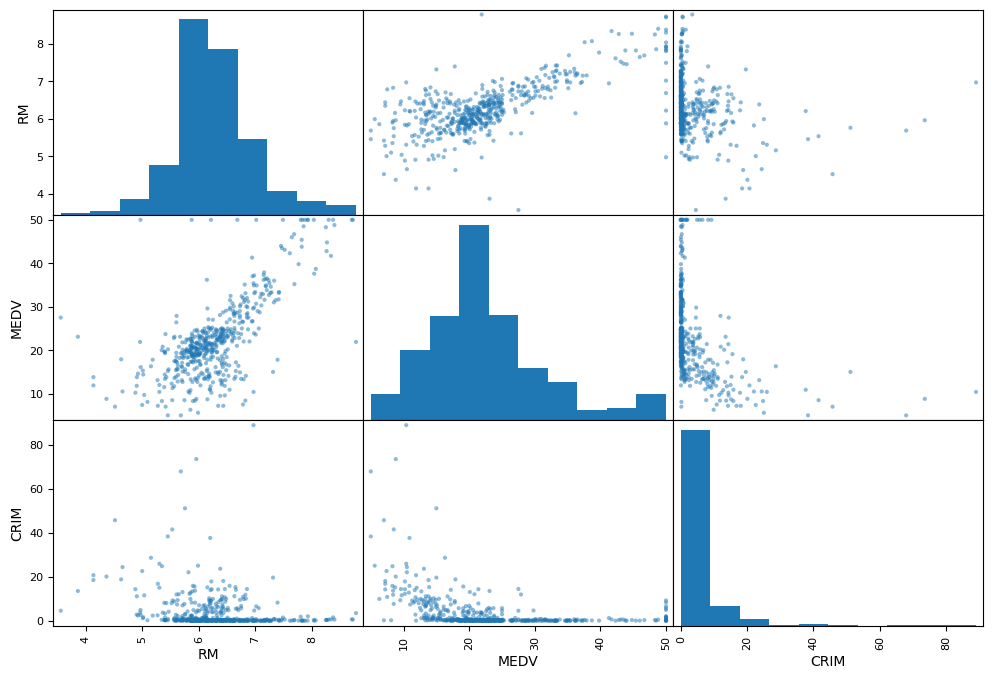

In [18]:
scatter_matrix(housing_df[attributes], figsize=(12,8))

## Using imputer to fit into missing values in dataset 

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_df)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_.shape

(14,)

In [21]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


# Sklearn Design 

## Creating a pipeline 

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('std_scaler', StandardScaler())
])

In [27]:
housing_num_tr = my_pipeline.fit_transform(housing_df)
housing_num_tr

array([[-0.41783001, -0.48671582, -0.59632231, ...,  0.44157346,
        -0.49464713, -0.10111057],
       [-0.41783233, -0.48671582, -0.59632231, ...,  0.39698405,
        -1.21104804,  1.32328678],
       [-0.41724164, -0.48671582, -1.31028713, ...,  0.41670418,
        -1.36386154,  1.18193437],
       ...,
       [-0.41394049, -0.48671582,  0.11326235, ...,  0.44157346,
        -0.98533268,  0.14897446],
       [-0.40826261, -0.48671582,  0.11326235, ...,  0.40377654,
        -0.86756815, -0.05761752],
       [-0.41549281, -0.48671582,  0.11326235, ...,  0.44157346,
        -0.67129393, -1.15581701]])

## Selecting model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num[])